In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Change later : Simple data description 
- all variables are floating point, except PRI_jet_num which is integer
- variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
- variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS.
- it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables.

In [3]:
print('y shape = ' + str(y.shape) + '\ntX shape =' + str(tX.shape) + '\nids shape = ' + str(ids.shape))

y shape = (250000,)
tX shape =(250000, 30)
ids shape = (250000,)


Description of the data:
- `y` (N) is composed of the labels (-1 or 1) of all the samples.  
- `tX` (N x F) is composed of the values of the features (F) for all samples (N)  
- `ids` (N) is composed of all the index (100000-349999) of the samples (N)  
  
Moreover, the number of features is 30 (F=30) and the number of samples is 250'000 (N=250'000). Non recorded data has value `-999`. 

## Machine learning

In [4]:
from implementations import *

### Data pre-processing 

In [5]:
# putting the meaningless values to the median of the column
tX = np.where(tX==-999., np.nan,tX)
med_X = np.nanmedian(tX, axis=0)

inds = np.where(np.isnan(tX))
tX[inds] = np.take(med_X, inds[1])

In [6]:
print(np.where(tX[0] == 2))

(array([22], dtype=int64),)


In [7]:
# remove categorical data and standarize the rest
ntX = np.delete(tX, 22, axis=1)
ntX = np.apply_along_axis(standardize, 1, ntX)

### Exploratory analysis

### Feature processing

**Least squares**

In [8]:
(w_ls, loss_ls) = least_squares(y, ntX)

print("w* ={w}\n\nmse={loss}".format(
    w=w_ls, loss=loss_ls))

w* =[ -2.18207473  -2.7283866   -2.7613673   -2.14202046 -22.30158529
  -2.00160129  -2.61498485  18.25582255  -2.32332418   3.16633738
 -18.33424023   1.33355252  21.61321339  -6.86996476  -2.19582116
  -2.23977977  -6.66168328  -2.23804064  -2.14013874  -1.9902568
  -2.21844249  -2.26899391  -2.32008043  -2.2108351   -2.27337968
  -3.41696759  -2.12727989  -2.42192867  -7.59922833]

mse=0.33363954622100606


**Least squares with Gradient Descent**

In [9]:
#define parameters

initial_w = np.zeros(ntX.shape[1])
max_iters = 50
gammas = np.logspace(-6, -1, 50)

losses_gd = []
ws_gd = []
for gamma in gammas:
    (w, loss) = least_squares_GD(y, ntX, initial_w, max_iters, gamma)
    losses_gd.append(loss)
    ws_gd.append(w)

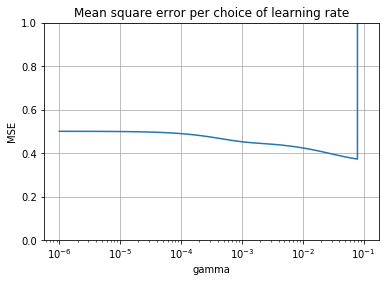

In [13]:
#plot the losses per gamma

fig, ax = plt.subplots()
ax.semilogx(gammas, losses_gd)

ax.set(xlabel='gamma', ylabel='MSE',
       title='Mean square error per choice of learning rate')
ax.grid()
ax.set_ylim([0, 1])
plt.show()

In [14]:
idx = np.argmin(losses_gd)

loss_gd = losses_gd[idx]
w_gd = ws_gd[idx]
gamma_gd = gammas[idx]

print("w* ={w}\n\nmse={loss}\n\ngamma={gamma}".format(
    w=w_gd, loss=loss_gd, gamma=gamma_gd ))

w* =[-0.00428259 -0.42633084 -0.02875235  0.10214093  0.02963783  0.05778338
  0.02693544  0.03079665 -0.02461047  0.03292792  0.02178753  0.04100657
  0.03114977  0.15763697  0.03121345  0.03069771 -0.0734314   0.03131602
  0.03156439 -0.07673277  0.03164055 -0.05513299 -0.05102692  0.0312239
  0.03125822 -0.0839812   0.03127273  0.03110219  0.01118937]

mse=0.37207166993353874

gamma=0.07906043210907701


**Least squares with Stochastic Gradient Descent**

In [16]:
initial_w = np.zeros(ntX.shape[1])
max_iters = 50
gammas = np.logspace(-6, -1, 50)

losses_sgd = []
ws_sgd = []
for gamma in gammas:
    (w, loss) = least_squares_SGD(y, ntX, initial_w, max_iters, gamma)
    losses_sgd.append(loss)
    ws_sgd.append(w)

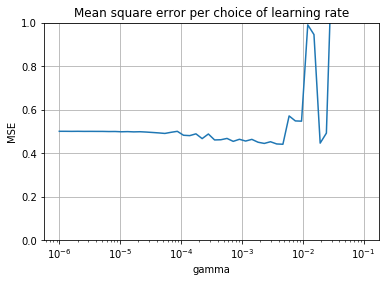

In [17]:
#plot the losses per gamma used
fig, ax = plt.subplots()
ax.semilogx(gammas, losses_sgd)

ax.set(xlabel='gamma', ylabel='MSE',
       title='Mean square error per choice of learning rate')
ax.grid()
ax.set_ylim([0, 1])
plt.show()

In [18]:
idx = np.argmin(losses_sgd)

loss_sgd = losses_sgd[idx]
w_sgd = ws_sgd[idx]
gamma_sgd = gammas[idx]

print("w* ={w}\n\nmse={loss}\n\ngamma={gamma}".format(
    w=ws_sgd[-1], loss=loss_sgd, gamma = gamma_sgd))

w* =[ 193409.97480008 -173720.6889938   129953.3315197   214495.63332799
 -104258.0329557   676188.87514667 -118388.34049027 -106752.68386666
  -19349.82310494  326907.29859335 -107660.36591797 -104225.03590272
 -110979.13333521  -87795.51357683 -123524.80465484 -111801.40879591
  -36677.28911064 -131190.26571407 -129701.38029627 -136581.96176658
 -114858.92367615  390366.66743499   35488.45678327 -121331.32883238
 -141140.12051375   24533.11503147 -117195.8934543  -118394.9152307
  224184.55755217]

mse=0.4403227223461156

gamma=0.004714866363457394


In [19]:
print(losses_sgd)

[0.4999210391232846, 0.49986957615830097, 0.49962160996963817, 0.49985953957865165, 0.4994908360996924, 0.49959338961373606, 0.49944460294691756, 0.4993800890805749, 0.4987875914800003, 0.49898045764720406, 0.4977284362081087, 0.49844170884446454, 0.4972473105427623, 0.49793002979441187, 0.4964254849390014, 0.4945141581932411, 0.49251988554416015, 0.4900890112301819, 0.49531706508691276, 0.49980352519176413, 0.4816942366658925, 0.4800180738056256, 0.48820511832353214, 0.46629644078199545, 0.48749289141610846, 0.4601721505702664, 0.46102208190329386, 0.46712081108741427, 0.4536544180257976, 0.4631436818954055, 0.45505729913237025, 0.46279702885443535, 0.4496306531819854, 0.4441522288483689, 0.4518856121344083, 0.44170624442090084, 0.4403227223461156, 0.5705593870637646, 0.5476660995649, 0.5464985734609062, 0.9895487332867814, 0.9448340837745097, 0.44550818119201624, 0.49146596191587394, 1.3959563633389347, 1.151445514015719, 2.4005599770358312, 3.211493331808351, 225359.91537038336, 117

**Ridge regression**

*Cross-validation hyperparameter selection*

In [ ]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)

In [ ]:
seed = 1
degree = 2
k_fold = 4
lambdas = np.logspace(-4, 0, 20)

k_indices = build_k_indices(y, k_fold, seed)

rmse_tr = []
rmse_te = []

for lambda_ in  lambdas:
    l_rmse_tr = []
    l_rmse_te = []
    for k in range(k_fold):
        loss_tr, loss_te = cross_validation(y, ntX, k_indices, k, lambda_, degree)
        l_rmse_tr.append(np.sqrt(2*loss_tr))
        l_rmse_te.append(np.sqrt(2*loss_te))
    rmse_tr.append(np.mean(l_rmse_tr))
    rmse_te.append(np.mean(l_rmse_te))
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

*Bias-variance decomposition for complexity determination*

In [ ]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    plt.plot(degrees, rmse_tr.T, 'b', linestyle="-", color=([0.7, 0.7, 1]),
        label='train', linewidth=0.3)
    plt.plot(degrees, rmse_te.T, 'r', linestyle="-", color=[1, 0.7, 0.7], label='test', linewidth=0.3)
    plt.plot(degrees, rmse_tr_mean.T, 'b', linestyle="-", label='train', linewidth=3)
    plt.plot(degrees, rmse_te_mean.T, 'r', linestyle="-", label='test', linewidth=3)
    plt.ylim(0.2, 0.7)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")

In [ ]:
seeds = range(10)
ratio_train = 0.5
degrees = range(1, 10)

rmse_tr = np.empty((len(seeds), len(degrees)))
rmse_te = np.empty((len(seeds), len(degrees)))

for index_seed, seed in enumerate(seeds):
    np.random.seed(seed)
        
    x_tr, x_te, y_tr, y_te = split_data(ntX, y, ratio_train, seed)        
        
    mse_tr = []
    mse_te = []
    
    for index_deg, deg in enumerate(degrees): 
        tx_tr = build_poly(x_tr, deg)
        tx_te = build_poly(x_te, deg)
            
        w_tr, mse_tr = least_squares(y_tr, tx_tr)
        mse_te = compute_mse(y_te, tx_te, w_tr)
            
        rmse_tr[index_seed][index_deg] = np.sqrt(2*np.array(mse_tr))
        rmse_te[index_seed][index_deg] = np.sqrt(2*np.array(mse_te))

bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

### Overfitting vs Underfitting

### Methods application and visualization

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)